# Exercises for Chapter 3

## Import packages

In [11]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

The cell below defines two functions to manually calculate a Fourier transform and an inverse Fourier transform. 

In [4]:
## fourrier transform of a box

def my_ft(time, func, freq):
  '''
  A function to calculate FT manually.
  time: the time array (needs to be regular)
  func: the function of time
  freq: the desired array of frequencies. 
  '''
  ft = np.empty(freq.shape, complex)
  dt = time[1]-time[0]
  for i in range(0,freq.size):
    ft[i] = dt * np.sum( func*np.exp(-1.j*2*np.pi*freq[i]*time) )

  return(ft)

def my_ift(freq, func, time):
  '''
  A function to calculate inverse FT manually.
  freq: the frequency array (needs to be regular)
  func: the function of frequency
  time: the desired array of times. 
  '''
  ift = np.empty(time.shape, complex)
  df = freq[1]-freq[0]
  for i in range(0,time.size):
    ift[i] = df * np.sum( func*np.exp(-1.j*2*np.pi*time[i]*freq) )

  return(ift)

## 1. Illustration of a Fourier transform

/Users/vpetit/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


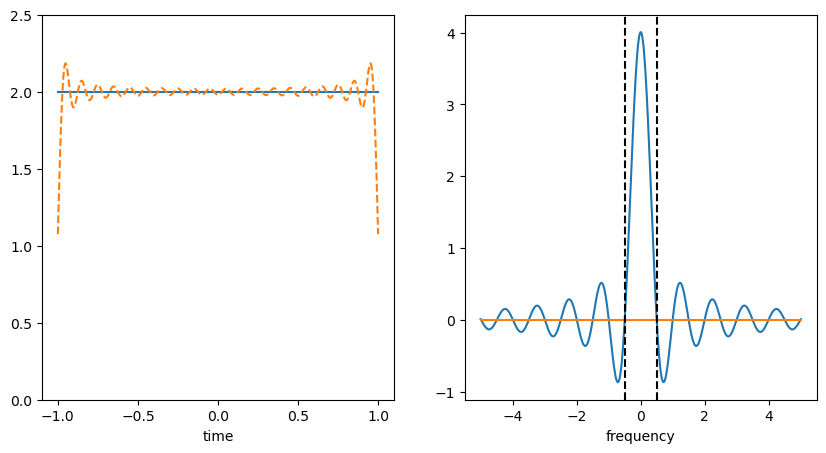

In [5]:
T = 2
A = 2
time = np.linspace(-T/2,T/2, 500)
func = A*np.ones(time.size)

freq = np.linspace(-10/T, 10/T, 500)

ft = my_ft(time, func, freq)

bound = 1
ft_analytic = A*2*np.sin(2*np.pi*freq*bound)/(2*np.pi*freq)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(time, func)
ax[0].set_ylim(0,2.5)
ax[0].set_xlabel('time')

ax[1].plot(freq, ft.real)
ax[1].plot(freq, ft.imag)
ax[1].set_xlabel('frequency')
ax[1].axvline(x=1/T, c='k', ls='--')
ax[1].axvline(x=-1/T, c='k', ls='--')

ift = my_ift(freq, ft, time)
#ax[0].plot(time, ift, ls='--')

long_freq = np.linspace(-20/T, 20/T, 1000)
long_ft = my_ft(time, func, long_freq)
#ax[1].plot(long_freq, long_ft)
ax[0].plot(time, my_ift(long_freq, long_ft, time), ls='--')

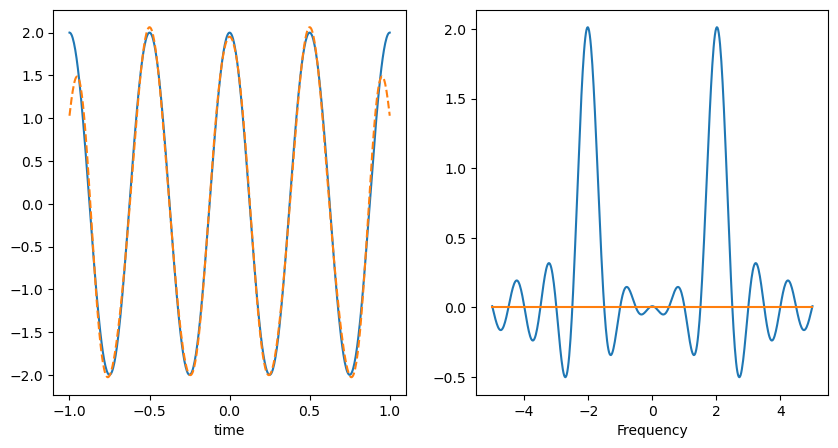

In [6]:
T = 2
A = 2
time = np.linspace(-T/2,T/2, 500)

P = 0.5
nu = 1/P # =2
func = A*np.cos(2*np.pi*nu * time)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(time, func)
ax[0].set_xlabel('time')

freq = np.linspace(-10/T, 10/T, 500)

ft = my_ft(time, func, freq)

ax[1].plot(freq, ft.real)
ax[1].plot(freq, ft.imag)
ax[1].set_xlabel('Frequency')

ift = my_ift(freq, ft, time)
ax[0].plot(time, ift, ls='--')

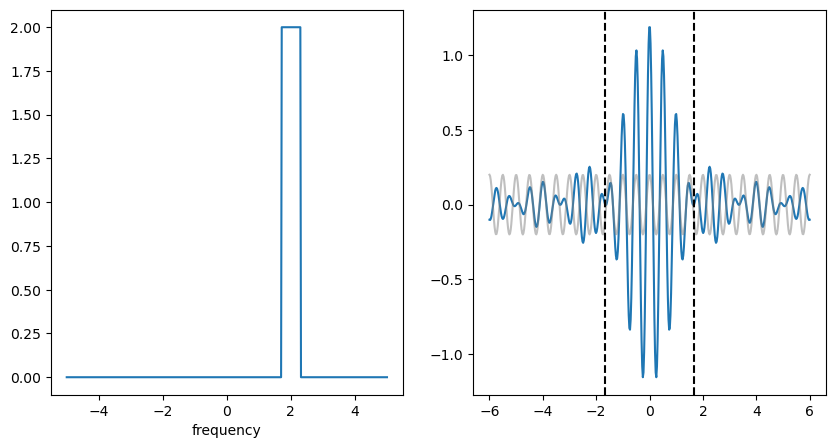

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

nu0 = 2.0
dnu = 0.6
func = np.zeros(freq.size)
func[np.logical_and(freq>=nu0-dnu/2, freq<=nu0+dnu/2)]=A

ax[0].plot(freq, func)
ax[0].set_xlabel('frequency')

long_time = np.linspace(-6,6, 500)

ift = my_ift(freq, func, long_time)

ax[1].plot(long_time, ift.real)
#ax[1].plot(long_time, ift.imag)

ax[1].plot(long_time, 0.2*np.cos(2*np.pi*2.0*long_time), c='grey', alpha=0.5)

coherence_time =  1/(dnu)
ax[1].axvline(x=-coherence_time, c='k', ls='--')
ax[1].axvline(x=coherence_time, c='k', ls='--')


599.5849159999999 THz
1.6678204759907605e-15 s


/var/folders/b0/wx58lg256fd4p48kl1w5l1zw0000gp/T/ipykernel_73949/1396985148.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  Ax_nu[i] = dt * np.sum( Ex*np.exp(-1.j*2*np.pi*freq[i].to(u.Hz).value*t) )


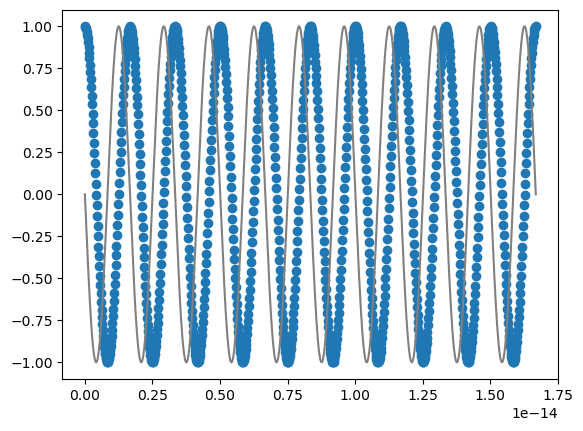

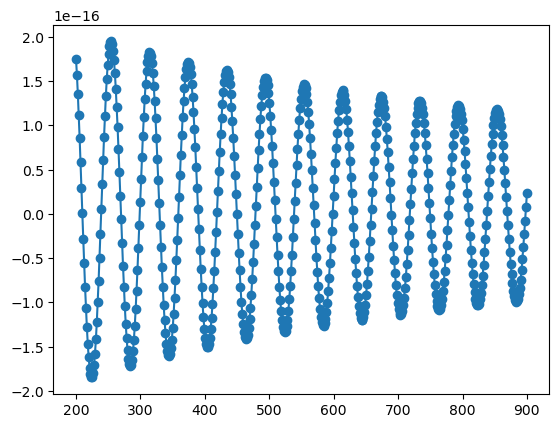

In [12]:
wave0 = 500*u.nm
dwave = 10*u.nm

nu = (const.c/wave0).to(u.THz)
print(nu)
P = (1/nu).decompose()
print(P)

t = np.linspace(0,10*P.value, 1000)
dt = t[1]
omega_t = (2*np.pi*nu*t).decompose().value

Ax = 1.0
dx = 0.0
Ex = Ax*np.exp(-1.j*(omega_t-dx))

fig, ax = plt.subplots(1,1)
ax.scatter(t,Ex.real)
ax.plot(t,Ex.imag, c='0.5')

freq = np.linspace(200,900, 500)*u.THz
Ax_nu = np.zeros(freq.size)

for i in range(0,freq.size):
  Ax_nu[i] = dt * np.sum( Ex*np.exp(-1.j*2*np.pi*freq[i].to(u.Hz).value*t) )

fig, ax = plt.subplots(1,1)
ax.scatter(freq, Ax_nu)
ax.plot(freq, Ax_nu)

frequency 599.5849159999999 THz with a bandpass of 11.991698319999998 THz
1.6678204759907605e-15 s


(0.0, 100.0)

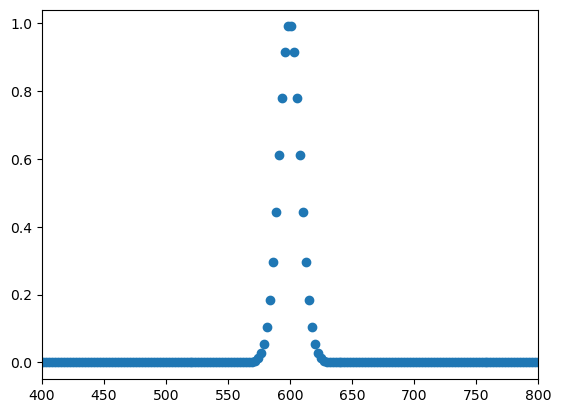

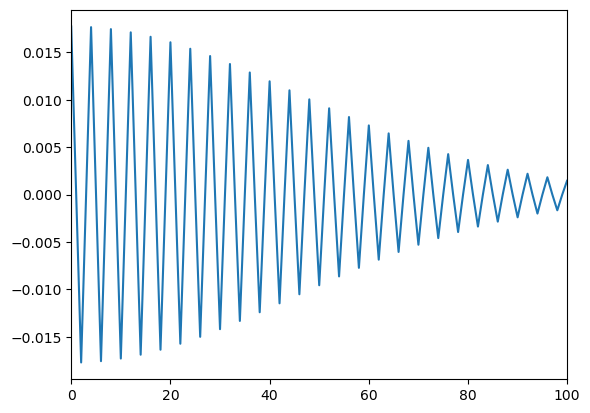

In [13]:
wave0 = 500*u.nm
dwave = 10*u.nm

nu = (const.c/wave0).to(u.THz)

dnu = (const.c/wave0**2*dwave).to(u.THz)
print('frequency {} with a bandpass of {}'.format(nu, dnu))
P = (1/nu).decompose()
print(P)

nu_arr = np.linspace(nu-50*dnu, nu+50*dnu, 500)
Ax_nu = np.exp( -(nu_arr-nu)**2/dnu**2)

fig, ax = plt.subplots(1,1)
ax.scatter(nu_arr, Ax_nu)
ax.set_xlim(400,800)

Ex = np.fft.irfftn(Ax_nu)

fig, ax = plt.subplots(1,1)
ax.plot(Ex)
ax.set_xlim(0,100)